# Aula 07 - Regressão Polinomial

Regressão polinomial é uma técnica utilizada para modelar a relação entre uma variável independente 𝑥 e uma variável dependente 
𝑦. A ideia básica é ajustar uma equação polinomial aos dados, em vez de uma linha reta como na regressão linear simples.

Em termos simples, enquanto a regressão linear simples se ajusta a uma linha reta aos dados, a regressão polinomial se ajusta a curvas mais complexas, permitindo capturar relações não lineares entre as variáveis. Isso é feito adicionando termos polinomiais de ordem superior à equação de regressão.

A forma geral de uma regressão polinomial de ordem 𝑛 é representada pela equação:

𝑦 = 𝛽0 + 𝛽1 𝑥1 + 𝛽2 𝑥2 + ⋯ + 𝛽𝑛 𝑥𝑛 + 𝜖

onde 𝑦 é a variável dependente, 𝑥 são as variáveis independentes, 𝛽0, 𝛽1,…,𝛽𝑛 são os coeficientes a serem estimados e 𝜖 é o erro aleatório.

O grau 𝑛 n do polinômio é determinado com base na complexidade dos dados e na natureza da relação entre as variáveis. A escolha de um polinômio de ordem adequada é importante para evitar overfitting (ajuste excessivo aos dados de treinamento) ou underfitting (ajuste insuficiente aos dados).

Primeiramente vamos carregar uma função de pré-processamento que já criamos, que é a da extração da base de dados:

In [1]:
import numpy as np
import pandas as pd

def loadDataset(filename):
    baseDeDados = pd.read_csv(filename, delimiter=';')
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    return X, y, baseDeDados

Agora, vamos conferir qual será a base que utilizaremos nesta aula. Basicamente queremos criar um modelo que preveja qual será o salário de um funcionário com base somente em quantos anos de experiência ele tem.

In [2]:
baseDeDados = pd.read_csv("salary.csv", delimiter=';')
baseDeDados.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


A título de comparação, vamos repetir o código de regressão linear que já utilizamos e lembrar o que significa cada linha.


**Importação da Classe LinearRegression:**  *from sklearn.linear_model import LinearRegression*

Esta linha importa a classe LinearRegression do módulo linear_model dentro da biblioteca scikit-learn. A LinearRegression é utilizada para realizar modelos de regressão linear, onde se tenta ajustar uma função linear aos dados para modelar a relação entre variáveis independentes (features) e a variável dependente (target).

**Inicialização do Objeto LinearRegression:**  *regressor = LinearRegression()*

Aqui, um objeto da classe LinearRegression é criado e inicializado como regressor. Este objeto servirá como o modelo de regressão linear que será treinado com os dados.

**Treinamento do Modelo de Regressão Linear:**  *regressor.fit(X, y)*

Esta linha ajusta (ou "treina") o modelo de regressão linear aos dados. X são as features de entrada (que depois serão transformadas em features polinomiais pelo PolynomialFeatures), e y são os valores alvo (ou target) que o modelo tentará prever. O método fit() ajusta o modelo aos dados de treinamento, aprendendo os coeficientes que melhor ajustam o modelo linear aos dados.

**Retorno**: *return regressor*

Retorna o modelo treinado.

In [3]:
def computeLinearRegressionModel(X, y):
    from sklearn.linear_model import LinearRegression # Importação da classe
    regressor = LinearRegression() #Inicialização do objeto
    regressor.fit(X, y) # Treinamento do modelo

    return regressor

Agora, vamos trazer criar o código de regressão polinomial, onde "d" é o nível do polinômio.

Vamos explicar linha por linha:

**Importação da Classe PolynomialFeatures:**
*from sklearn.preprocessing import PolynomialFeatures*

Esta linha importa a classe PolynomialFeatures do módulo preprocessing dentro da biblioteca scikit-learn. Esta classe é utilizada para gerar uma nova matriz de features que consiste em todas as combinações polinomiais das features com grau menor ou igual ao especificado.

**Inicialização do Objeto PolynomialFeatures:**
*polynomialFeatures = PolynomialFeatures(degree = d)*

Aqui, um objeto da classe PolynomialFeatures é criado e inicializado com um parâmetro degree = d. O parâmetro degree especifica o grau máximo dos polinômios gerados. Por exemplo, se d = 2, serão geradas features que consistem em todas as combinações de até grau 2 das features originais.

Por exemplo, se X originalmente é [1,2,3], teremos que o X polinomial de grau 2 será:

[1,1,1] (elevado a zero)

[1,2,3] (elevado a um)

[1,4,9] (elevado a dois)

**Transformação dos Dados Originais:**
*XPolynomial = polynomialFeatures.fit_transform(X)*

Esta linha aplica a transformação polinomial aos dados X originais. O método fit_transform() ajusta o modelo aos dados (fit) e, em seguida, transforma os dados (transform) de acordo com o modelo ajustado. Neste caso, ele ajusta o PolynomialFeatures aos dados X e transforma X em XPolynomial, que conterá todas as combinações polinomiais das features de acordo com o grau especificado em degree.

**Retorno**: *return XPolynomial, polyLinearRegression*

Retorna tanto o X transformado em polinômio quanto o modelo treinado.

In [4]:
def computePolynomialLinearRegressionModel(X, y, d): 
    
    # Transformação em Features Polinomiais
    from sklearn.preprocessing import PolynomialFeatures # Importação da Classe PolynomialFeatures
    polynomialFeatures = PolynomialFeatures(degree = d) # Inicialização do objeto
    XPolynomial = polynomialFeatures.fit_transform(X) # Transforma os dados originais
    
    # Alimentar uma regressão linear com o X polinomial
    from sklearn.linear_model import LinearRegression # Importação da Classe LinearRegression
    polyLinearRegression = LinearRegression() # Inicialização do Objeto
    polyLinearRegression.fit(XPolynomial, y) # Treinamento do Modelo de Regressão Linear

    return XPolynomial, polyLinearRegression #Vamos retornar tanto o X polinomial quanto o regressor

Para ilustrar melhor como os dados são transformados antes de alimentar o modelo, veja o exemplo abaixo:

In [5]:
def showPoly(filename, d):
    X, y, csv = loadDataset(filename) #Carrega os dados
    
    # Transforma os dados
    from sklearn.preprocessing import PolynomialFeatures
    polynomialFeatures = PolynomialFeatures(degree = d)
    XPolynomial = polynomialFeatures.fit_transform(X)

    print('Anos de Experiência')
    print(X)
    
    print('Matrizes Polinomiais criadas a partir dos anos de experiência')
    print(XPolynomial)
    
showPoly("salary.csv", 2)

Anos de Experiência
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
Matrizes Polinomiais criadas a partir dos anos de experiência
[[  1.     1.1    1.21]
 [  1.     1.3    1.69]
 [  1.     1.5    2.25]
 [  1.     2.     4.  ]
 [  1.     2.2    4.84]
 [  1.     2.9    8.41]
 [  1.     3.     9.  ]
 [  1.     3.2   10.24]
 [  1.     3.2   10.24]
 [  1.     3.7   13.69]
 [  1.     3.9   15.21]
 [  1.     4.    16.  ]
 [  1.     4.    16.  ]
 [  1.     4.1   16.81]
 [  1.     4.5   20.25]
 [  1.     4.9   24.01]
 [  1.     5.1   26.01]
 [  1.     5.3   28.09]
 [  1.     5.9   34.81]
 [  1.     6.    36.  ]
 [  1.     6.8   46.24]
 [  1.     7.1   50.41]
 [  1.     7.9   62.41]
 [  1.     8.2   67.24]
 [  1.     8.7   75.69]
 [  1.     9.    81.  ]
 [  1.     9.5   90.25]
 [  1.     9.6   92.16]
 [  1

Abaixo vamos criar uma função para exibir um gráfico para que possamos comparar os dois modelos.

In [6]:
import matplotlib.pyplot as plt

def showPlotLin(X, y, linearRegressor):
    plt.scatter(X, y, color = 'red') #plot real y points
    plt.plot(X, linearRegressor.predict(X), color = 'blue') #plot predicted points in line
    plt.title("Comparando pontos reais com a reta produzida pela regressão linear")
    plt.xlabel("Experiência em anos")
    plt.ylabel("Salário")
    plt.show()

def showPlotPoly(XPoints, yPoints, XLine, yLine):
    plt.scatter(XPoints, yPoints, color = 'red') #plot real y points
    plt.plot(XLine, yLine, color = 'blue') #plot predicted points in line
    plt.title("Comparando pontos reais com a reta produzida pela regressão polinomial")
    plt.xlabel("Experiência em anos")
    plt.ylabel("Salário")
    plt.show()

E finalmente, vamos criar um código e compila e compara os dois tipos de regressão (linear simples e polinomial).

In [7]:
def runPolynomialRegressionExample(filename):
    X, y, csv = loadDataset(filename)
    
    # Regressão Linear
    linearRegressor = computeLinearRegressionModel(X, y)
    
    # Regressão Polinomial
    XPoly, polyLinearRegressor = computePolynomialLinearRegressionModel(X, y, 4) 
    #O número é grau do polinômio que podemos escolher.

    #Exibir gráficos
    showPlotLin(X, y, linearRegressor)
    showPlotPoly(X, y, X, polyLinearRegressor.predict(XPoly))

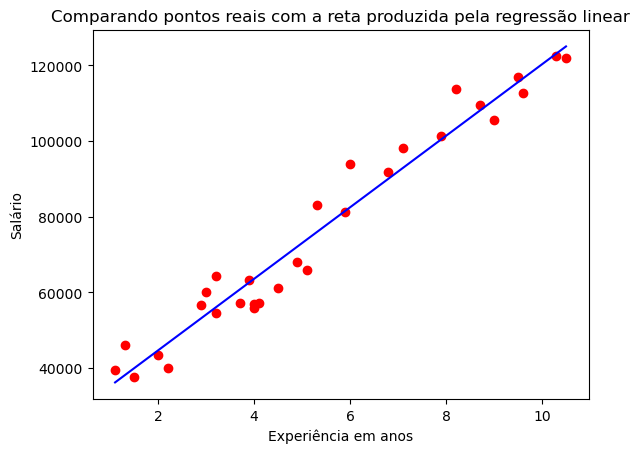

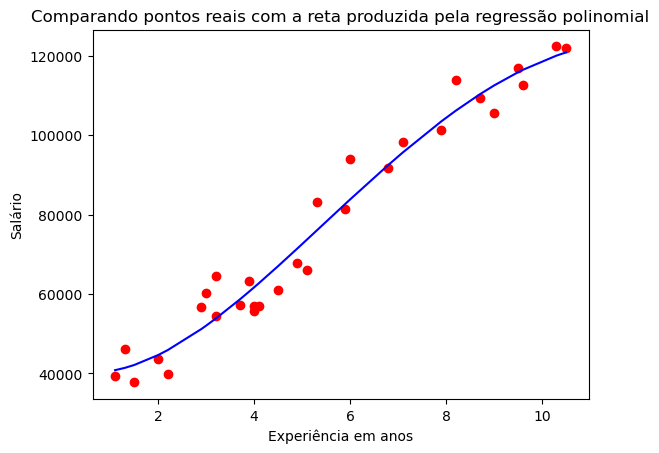

In [8]:
runPolynomialRegressionExample("salary.csv")

Aqui é outro exemplo com uma base mais "certinha" para vermos quanta influência essa técnica pode ter.

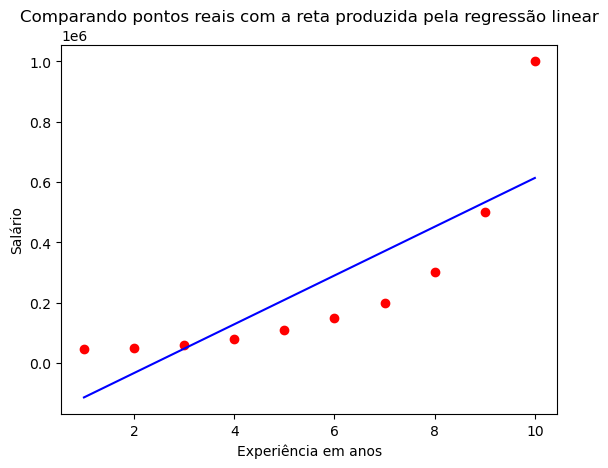

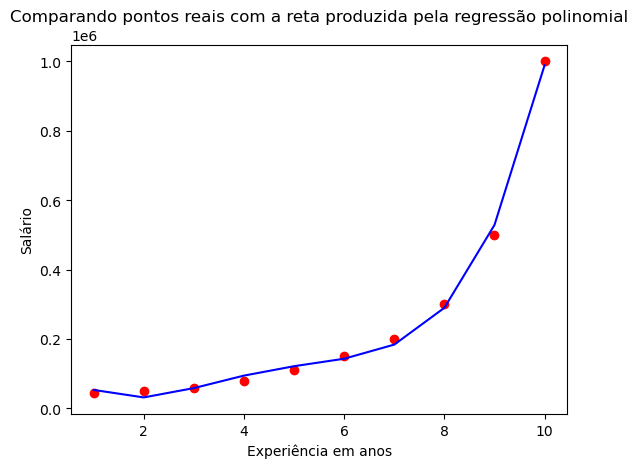

In [9]:
runPolynomialRegressionExample("salary2.csv")